In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

In [2]:
tf.keras.utils.set_random_seed(17039)

In [3]:
test_dataset = tf.data.Dataset.load(f".\\datasets\\dataset_full_version_2\\test_dataset")
test_dataset = test_dataset.shuffle(test_dataset.cardinality(), reshuffle_each_iteration=False).batch(test_dataset.cardinality())

In [4]:
model = keras.models.load_model(".\\runs\\run_9\\model_300e.h5")
model.load_weights(".\\runs\\run_9\\min_val_loss_weights.h5")

In [5]:
loss, acc = model.evaluate(test_dataset)

1/1 [==============================] - 2s 2s/step - loss: 0.1209 - accuracy: 0.9500


In [6]:
labels = ["AS", "MR", "MS", "MVP", "N"]
pred = model.predict(test_dataset)
true = next(test_dataset.as_numpy_iterator())[1]
y_true = np.argmax(true, axis=1)
y_pred = np.argmax(pred, axis=1)

1/1 [==============================] - 0s 227ms/step


In [8]:
precision_list, recall_list, fscore_list, _ = precision_recall_fscore_support(y_true, y_pred)
for i in range(5):
    print(f"Metrics for class '{labels[i]}':")
    print("Precision:", precision_list[i])
    print("Recall:", recall_list[i])
    print("F1-score:", fscore_list[i])
    print()
print("Average metrics:")
print("Precision:", np.average(precision_list))
print("Recall:", np.average(recall_list))
print("F1-score:", np.average(fscore_list))

Metrics for class 'AS':
Precision: 0.8695652173913043
Recall: 1.0
F1-score: 0.9302325581395349

Metrics for class 'MR':
Precision: 0.9473684210526315
Recall: 0.9
F1-score: 0.9230769230769231

Metrics for class 'MS':
Precision: 1.0
Recall: 0.9
F1-score: 0.9473684210526315

Metrics for class 'MVP':
Precision: 0.95
Recall: 0.95
F1-score: 0.95

Metrics for class 'N':
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Average metrics:
Precision: 0.9533867276887872
Recall: 0.95
F1-score: 0.9501355804538179


Text(50.722222222222214, 0.5, 'True')

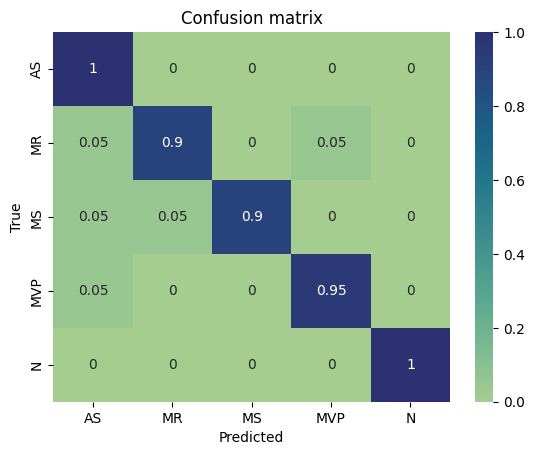

In [9]:
conf_mat = confusion_matrix(y_true, y_pred)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

sns.heatmap(conf_mat_normalized, annot=True, xticklabels=labels, yticklabels=labels, cmap="crest")
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')